### In this project I have visualized the distribution of a categorical, as the distribution of genders in a population as per 2022 world population. I have used bar chart and histogram for visualization.

Sample Dataset :- https://data.worldbank.org/indicator/SP.POP.TOTL

In [147]:
import pandas as pd      
import matplotlib.pyplot as plt

In [148]:
population_df = pd.read_excel('P_Data_Extract_From_World_Development_Indicators.xlsx')

In [149]:
# Removing the non-usable columns for my dataset
population_df.drop(['Series Name','Series Code'],axis=1,inplace=True)  

In [152]:
# To get the top 10 rows
population_df.head(10) 

,Country Name,Country Code,Male [YR2022],Female [YR2022]
0,Afghanistan,AFG,20766442.0,20362329.0
1,Albania,ALB,1385573.0,1392115.0
2,Algeria,DZA,22862237.0,22040987.0
3,American Samoa,ASM,21873.0,22399.0
4,Andorra,AND,40786.0,39038.0
5,Angola,AGO,17590767.0,17998220.0
6,Antigua and Barbuda,ATG,44782.0,48981.0
7,Argentina,ARG,22889298.0,23345532.0
8,Armenia,ARM,1250079.0,1530390.0
9,Aruba,ABW,50173.0,56272.0


In [153]:
# To get the last 10 rows
population_df.tail(10)

,Country Name,Country Code,Male [YR2022],Female [YR2022]
213,West Bank and Gaza,PSE,2.516444e+06,2.527169e+06
214,"Yemen, Rep.",YEM,1.702320e+07,1.667341e+07
215,Zambia,ZMB,9.877642e+06,1.014003e+07
216,Zimbabwe,ZWE,7.705601e+06,8.614935e+06
217,World,WLD,3.996521e+09,3.954426e+09
218,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN


In [133]:
# To check the null values and data type of my data
population_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     218 non-null    object 
 1   Country Code     218 non-null    object 
 2   Male [YR2022]    218 non-null    float64
 3   Female [YR2022]  218 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.1+ KB


In [134]:
population_df.columns

Index(['Country Name', 'Country Code', 'Male [YR2022]', 'Female [YR2022]'], dtype='object')

In [144]:
population_df['Country Name'].unique()   
# In my data there is row named 'World' which highlights the total male & female population of the world as per 2022

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

In [136]:
# To check which all columns have null value
population_df.isna().any()     

Country Name       True
Country Code       True
Male [YR2022]      True
Female [YR2022]    True
dtype: bool

In [137]:
population_df.isna().sum()   
# As I can see that there are same null values in all the columns

Country Name       5
Country Code       5
Male [YR2022]      5
Female [YR2022]    5
dtype: int64

In [138]:
# I have dropped all the null values to make my dataset uniform
population_df.dropna(inplace=True)  

In [154]:
# Converting all the integer value to numeric for further calculations
population_df['Male [YR2022]'] = pd.to_numeric(population_df['Male [YR2022]'])   
population_df['Female [YR2022]'] = pd.to_numeric(population_df['Female [YR2022]'])

In [140]:
# Making a new column called 'Total' for further data visualization 
population_df['Total'] = population_df['Male [YR2022]']+population_df['Female [YR2022]']

In [141]:
population_df.head(10)

,Country Name,Country Code,Male [YR2022],Female [YR2022],Total
0,Afghanistan,AFG,20766442.0,20362329.0,41128771.0
1,Albania,ALB,1385573.0,1392115.0,2777688.0
2,Algeria,DZA,22862237.0,22040987.0,44903224.0
3,American Samoa,ASM,21873.0,22399.0,44272.0
4,Andorra,AND,40786.0,39038.0,79824.0
5,Angola,AGO,17590767.0,17998220.0,35588987.0
6,Antigua and Barbuda,ATG,44782.0,48981.0,93763.0
7,Argentina,ARG,22889298.0,23345532.0,46234830.0
8,Armenia,ARM,1250079.0,1530390.0,2780469.0
9,Aruba,ABW,50173.0,56272.0,106445.0


# BAR GRAPH

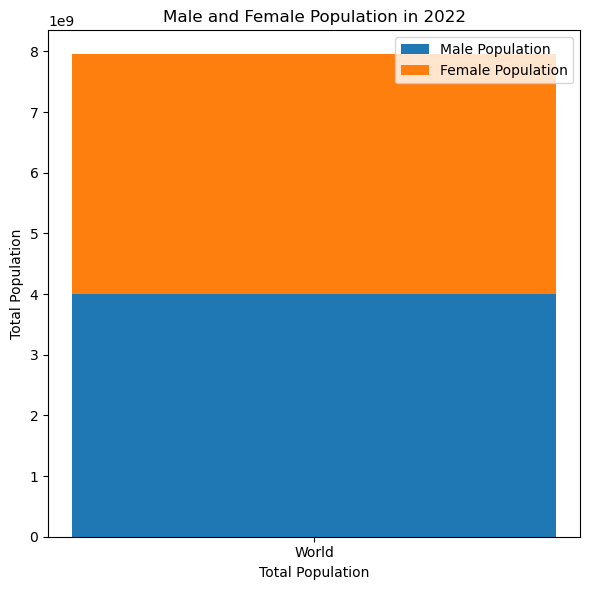

In [143]:
# Plotting bar graph
plt.figure(figsize=(6, 6))

# Excluding 'World' from the plot since it aggregates all data
df_plot = population_df[population_df['Country Name']=="World"]

# Bar plot for male population
plt.bar(df_plot['Country Name'], df_plot['Male [YR2022]'], label='Male Population')

# Bar plot for female population
plt.bar(df_plot['Country Name'], df_plot['Female [YR2022]'], bottom=df_plot['Male [YR2022]'], label='Female Population')

plt.xlabel('Total Population')
plt.ylabel('Total Population')
plt.title('Male and Female Population in 2022')
plt.legend()
plt.tight_layout()

# HISTOGRAM

In [77]:
# Filtering the most populated countries 
top_populated = population_df.sort_values(by='Total',ascending=False)
top_populated.drop([217],axis=0,inplace=True)       # Excluding 'World' from the plot since it aggregates all data 
top_populated.head(10)

## Showing the top 10 most populated countries

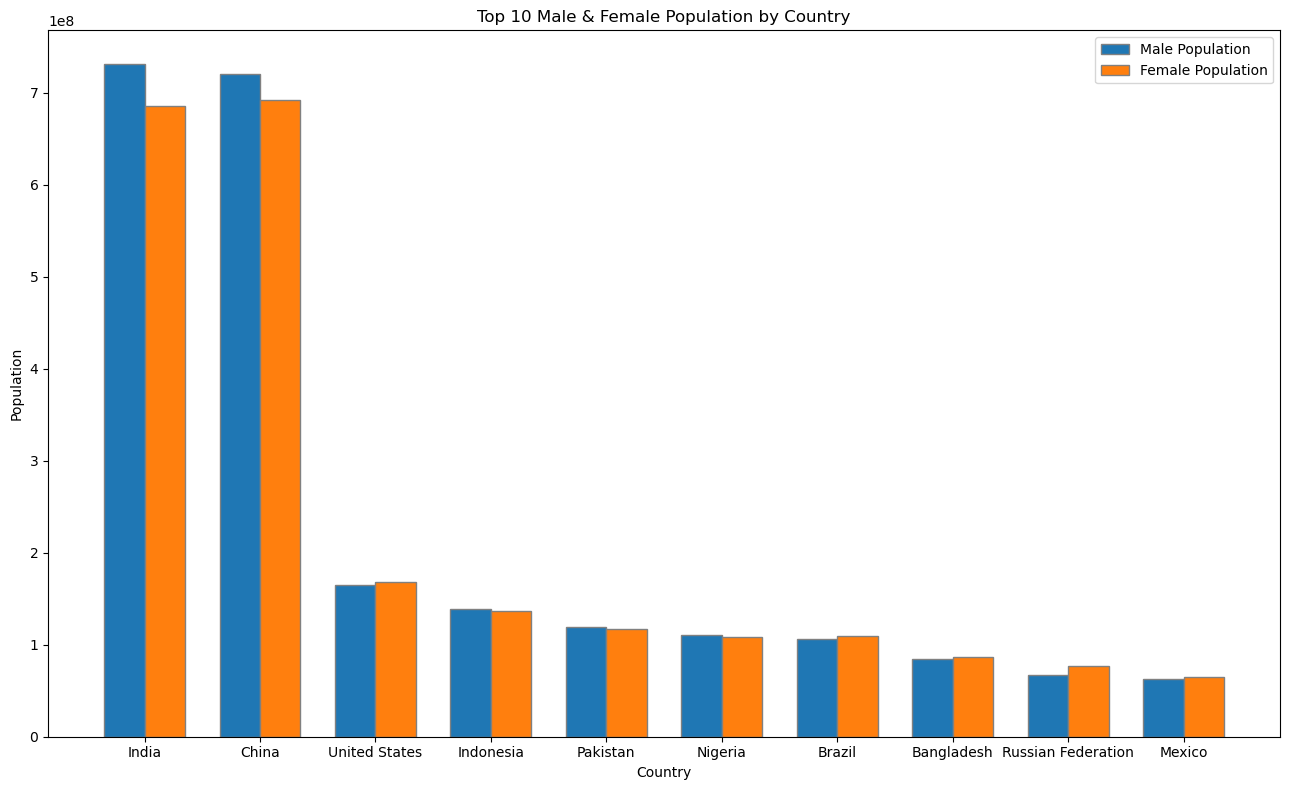

In [102]:
# Plotting the histogram
plt.figure(figsize=(13,8))

# Creating new data frame for top 10 country as per 2022
df_plot = top_populated.head[0:10]

# Bar width
bar_width = 0.35

# Positions for bars on x-axis
r1 = np.arange(len(df_plot))
r2 = [x + bar_width for x in r1]

# Bar plot for male population
plt.bar(r1, df_plot['Male [YR2022]'], width=bar_width, edgecolor='grey', label='Male Population')

# Bar plot for female population
plt.bar(r2, df_plot['Female [YR2022]'], width=bar_width, edgecolor='grey', label='Female Population')

plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Male & Female Population by Country')
plt.xticks([r + bar_width/2 for r in range(len(df_plot))], df_plot['Country Name'])
plt.legend()
plt.tight_layout()

In [103]:
# Filtering the least populated countries 
least_populated = population_df.sort_values(by='Total')
least_populated.head(10)

,Country Name,Country Code,Male [YR2022],Female [YR2022],Total
201,Tuvalu,TUV,5799.0,5513.0,11312.0
137,Nauru,NRU,6435.0,6233.0,12668.0
150,Palau,PLW,9376.0,8679.0,18055.0
27,British Virgin Islands,VGB,15062.0,16242.0,31304.0
183,St. Martin (French part),MAF,15111.0,16680.0,31791.0
75,Gibraltar,GIB,16308.0,16341.0,32649.0
164,San Marino,SMR,16380.0,17281.0,33661.0
130,Monaco,MCO,17872.0,18596.0,36468.0
114,Liechtenstein,LIE,19502.0,19825.0,39327.0
124,Marshall Islands,MHL,21223.0,20346.0,41569.0


## Showing the least 10 populated countries

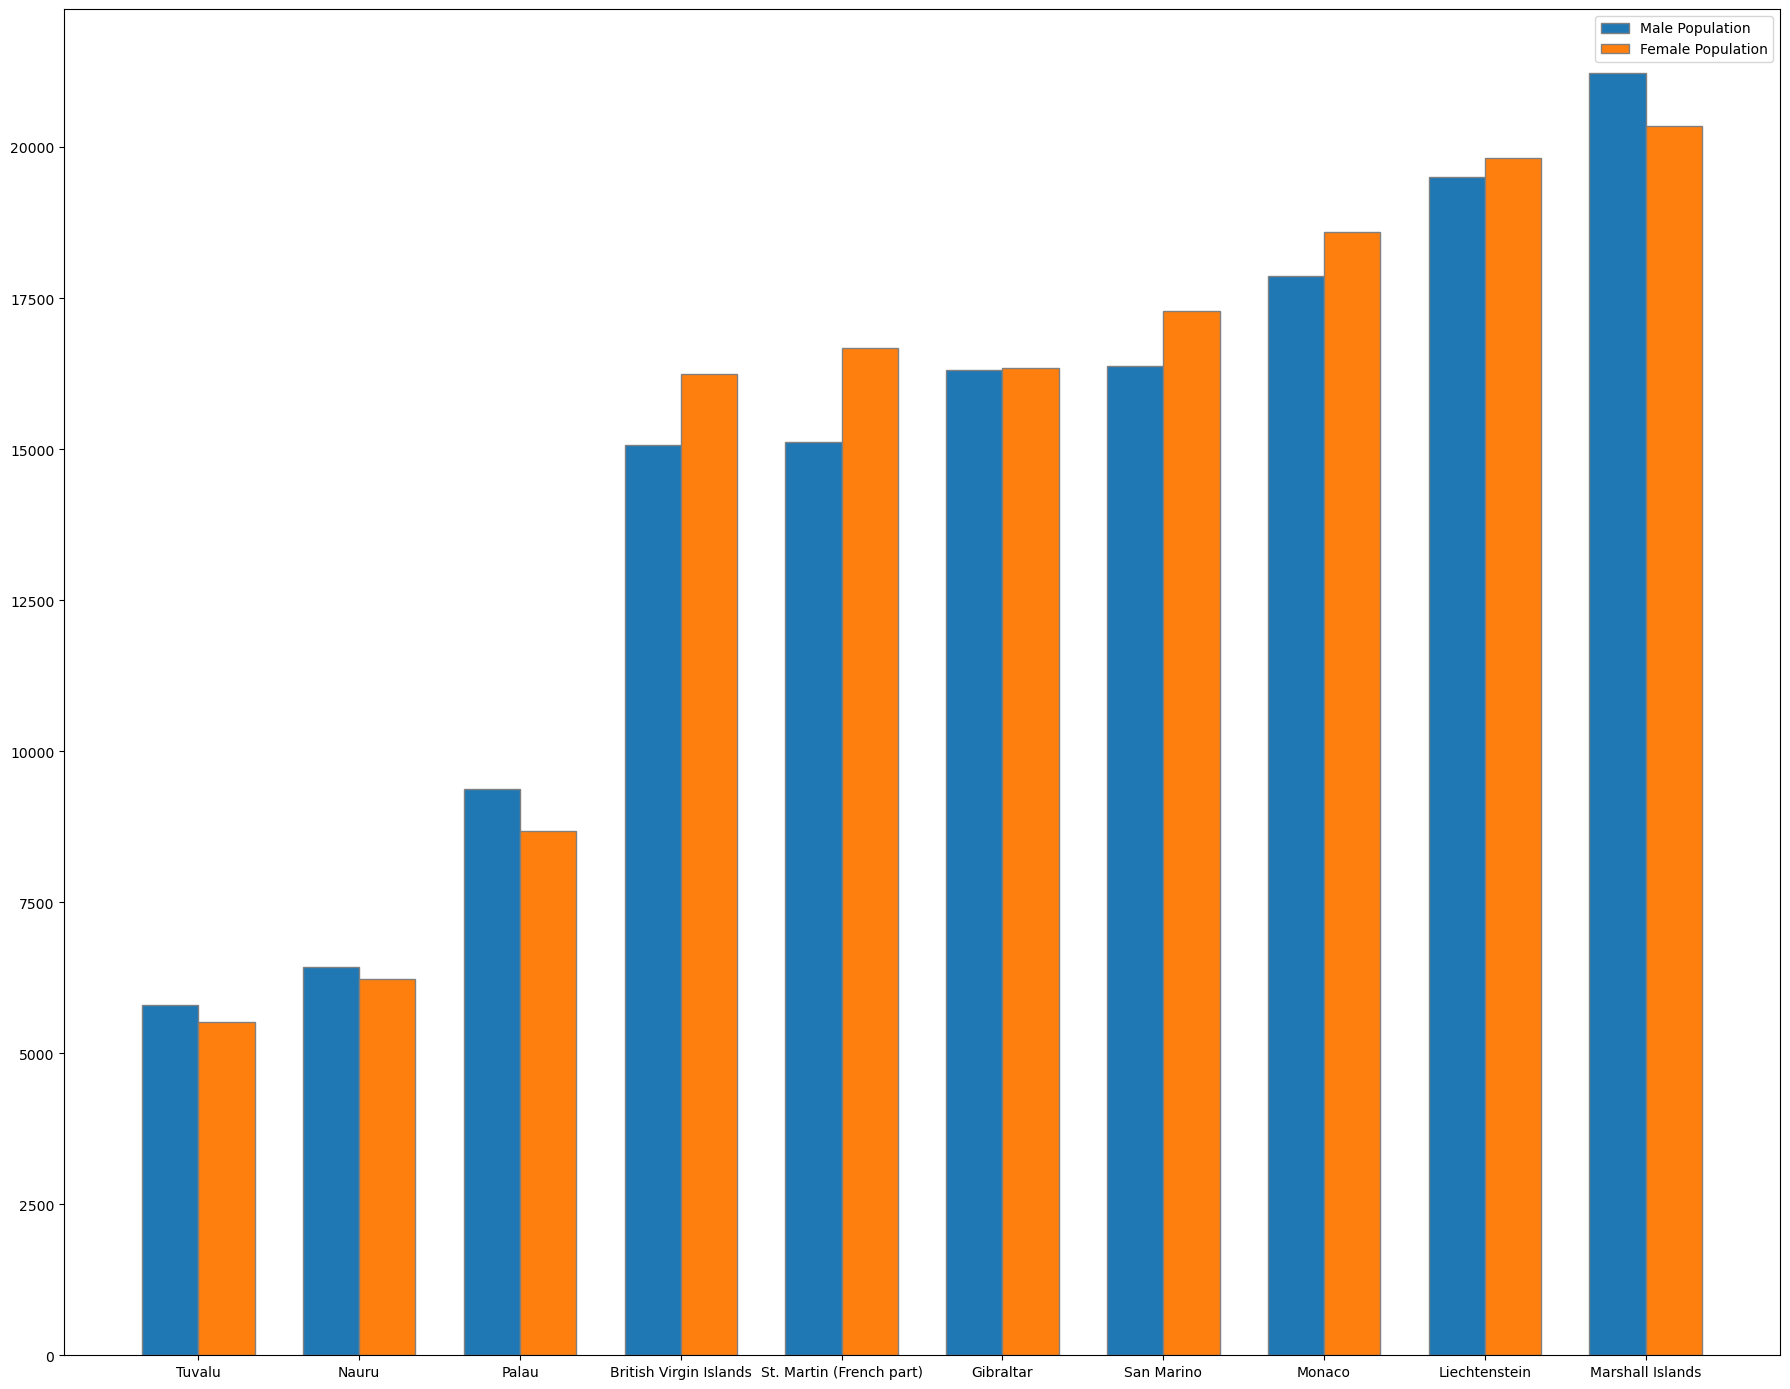

In [117]:
# Plotting the histogram
plt.figure(figsize=(18,14))

# Creating new data frame for least 10 country as per 2022
df_plot = least_populated[0:10]

# Bar width
bar_width = 0.35

# Positions for bars on x-axis
r1 = np.arange(len(df_plot))
r2 = [x + bar_width for x in r1]

# Bar plot for male population
plt.bar(r1,df_plot['Male [YR2022]'],width=bar_width,edgecolor='grey',label='Male Population')

# Bar plot for female population
plt.bar(r2,df_plot['Female [YR2022]'],width=bar_width,edgecolor='grey',label='Female Population')

plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Male & Female Population by Country')
plt.xticks([r + bar_width/2 for r in range(len(df_plot))], df_plot['Country Name'])
plt.legend()
plt.tight_layout()